## Capstone - Final Project: Battle of Neighboorhood Analysis
Answering the following questions - “How many Halal or Kosher Restaurants can be found within the Downtown Toronto area?” "How do the results from Toronto compare to New York City's offering?”

In [1]:
import numpy as np
import pandas as pd
import json 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas datafram
from bs4 import BeautifulSoup
import xml

### Get Postal Data for Toronto 
Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe

In [2]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(url,'lxml')

### Create Dataframe from the Postal Data
The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [3]:
table_post = soup.find('table')
fields = table_post.find_all('td')

postcode = []
borough = []
neighbourhood = []

for i in range(0, len(fields), 3):
    postcode.append(fields[i].text.strip())
    borough.append(fields[i+1].text.strip())
    neighbourhood.append(fields[i+2].text.strip())
        
df_pc = pd.DataFrame(data=[postcode, borough, neighbourhood]).transpose()
df_pc.columns = ['Postcode', 'Borough', 'Neighbourhood']
df_pc.head(10)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


 ### Removing Not Assigned information within borough column
 Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [4]:
df_pc['Borough'].replace('Not assigned', np.nan, inplace=True)
df_pc.dropna(subset=['Borough'], inplace=True)

df_pc.head(10)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


### Combine Neighborhoods with same postal code area
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [5]:
df_pcn = df_pc.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_pcn.columns = ['Postcode', 'Borough', 'Neighbourhood']
df_pcn

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Fixing Queen's Park
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [6]:
df_pcn['Neighbourhood'].replace('Not assigned', "Queen's Park", inplace=True)
df_pcn

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Last Cell
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe

In [7]:
df_pcn.shape

(103, 3)

### Getting Lat and Long for neighborhoods
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [8]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import folium # map rendering library

In [9]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo.columns = ['Postcode', 'Latitude', 'Longitude']

### Add Lat and Long to original dataframe
Combine the two dataframes into one

In [10]:
df_pos = pd.merge(df_pcn, df_geo, on=['Postcode'], how='inner')
df_tor = df_pos[['Borough', 'Neighbourhood', 'Postcode', 'Latitude', 'Longitude']].copy()
df_tor.head(10)

,Borough,Neighbourhood,Postcode,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,Scarborough,Woburn,M1G,43.770992,-79.216917
4,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029
7,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848


In [11]:
df_tor.to_csv('dftor.csv')

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

In [12]:
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Toronto are {}, {}.'.format(latitude, longitude))

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of the City of Toronto are 43.653963, -79.387207.


In [13]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Borough'], df_tor['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Checking dataframe

In [14]:
df_tor.head()

,Borough,Neighbourhood,Postcode,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,Scarborough,Woburn,M1G,43.770992,-79.216917
4,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [15]:
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of Toronto are {}, {}.'.format(latitude, longitude))

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of the City of Toronto are 43.653963, -79.387207.


### Create a new dataframe with neighborhoods in Downtown

In [16]:
downT_da = df_tor[df_tor['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downT_da.head(20)

,Borough,Neighbourhood,Postcode,Latitude,Longitude
0,Downtown Toronto,Rosedale,M4W,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",M4X,43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
3,Downtown Toronto,"Harbourfront, Regent Park",M5A,43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",M5B,43.657162,-79.378937
5,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418
6,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306
7,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383
8,Downtown Toronto,"Adelaide, King, Richmond",M5H,43.650571,-79.384568
9,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",M5J,43.640816,-79.381752


### Looking into Downtown

In [17]:
downT_da = df_tor[df_tor['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downT_da.head(20)

,Borough,Neighbourhood,Postcode,Latitude,Longitude
0,Downtown Toronto,Rosedale,M4W,43.679563,-79.377529
1,Downtown Toronto,"Cabbagetown, St. James Town",M4X,43.667967,-79.367675
2,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
3,Downtown Toronto,"Harbourfront, Regent Park",M5A,43.654260,-79.360636
4,Downtown Toronto,"Ryerson, Garden District",M5B,43.657162,-79.378937
5,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418
6,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306
7,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383
8,Downtown Toronto,"Adelaide, King, Richmond",M5H,43.650571,-79.384568
9,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",M5J,43.640816,-79.381752


### Build Second Map
Of the Downtown area

In [18]:
address_scar = 'Downtown,Toronto'
latitude_scar = 43.644771
longitude_scar = -79.422564
print('The geograpical coordinate of Downtown are {}, {}.'.format(latitude_scar, longitude_scar))

The geograpical coordinate of Downtown are 43.644771, -79.422564.


In [19]:
map_scarb = folium.Map(location=[latitude_scar, longitude_scar], zoom_start=12)
# add markers to map
for lat, lng, label in zip(downT_da['Latitude'], downT_da['Longitude'], downT_da['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_scarb)  
map_scarb

### Create a new dataframe about the downtown neighborhood from Foursquare

In [20]:
CLIENT_ID = '******'  # your Foursquare ID
CLIENT_SECRET = '*******' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [21]:
# Using Lat and Long select first neighborhood
neighborhood_latitude = downT_da.loc[0, 'Latitude'] # neighbourhood latitude value
neighborhood_longitude = downT_da.loc[0, 'Longitude'] # neighbourhood longitude value

neighborhood_name = downT_da.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of "{}" are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of "Rosedale" are 43.6795626, -79.37752940000001.


In [22]:
# pull Foursquare results  
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_scar, longitude_scar, VERSION, radius, LIMIT)

In [23]:
#view results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d22af54c0c084002561b45b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-584b4631730a923792576a68-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
          'suffix': '.png'},
         'id': '56aa371ce4b08b9a8d57356c',
         'name': 'Beer Bar',
         'pluralName': 'Beer Bars',
         'primary': True,
         'shortName': 'Beer Bar'}],
       'id': '584b4631730a923792576a68',
       'location': {'address': '1087 Queen St W',
        'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'distance': 148,
        'formattedAddress': ['1087 Queen St W',
         'Toronto ON M6J 1H3',
         'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.643457199496645,
   

In [24]:
#process results
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
#build dataframe
venues = results['response']['groups'][0]['items']  
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Otto's Bierhalle,Beer Bar,43.643457,-79.422279
1,El Almacen Yerba Mate Cafe + Gallery,Café,43.643682,-79.421627
2,The Theatre Centre,Theater,43.643241,-79.423264
3,apt 200,Bar,43.644026,-79.420063
4,Bar Fancy,Bar,43.643734,-79.421326
5,The Drake Hotel,Hotel,43.643053,-79.424589
6,Cafe Neon,Café,43.644130,-79.419670
7,Union Restaurant,New American Restaurant,43.645860,-79.419532
8,Mamakas Taverna,Greek Restaurant,43.646042,-79.419679
9,OddSeoul,Korean Restaurant,43.646192,-79.419601


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

83 venues were returned by Foursquare.


In [27]:
nearby_venues.groupby('categories').agg('mean')

,lat,lng
categories,,
Art Gallery,43.646921,-79.417342
Arts & Crafts Store,43.642913,-79.424883
Asian Restaurant,43.648643,-79.420495
Bakery,43.644874,-79.422382
Bar,43.644141,-79.422690
Beer Bar,43.643457,-79.422279
Bistro,43.645798,-79.419508
Breakfast Spot,43.643380,-79.423334
Brewery,43.647097,-79.419955


In [28]:
#pull venue data 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get venues for each neighborhood in Downtown

In [29]:
downtown_venues = getNearbyVenues(names=downT_da['Neighbourhood'],
                                   latitudes=downT_da['Latitude'],
                                   longitudes=downT_da['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie


In [30]:
downtown_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Mooredale House,43.678631,-79.380091,Building
1,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
2,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
3,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
4,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
5,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
6,"Cabbagetown, St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
7,"Cabbagetown, St. James Town",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
8,"Cabbagetown, St. James Town",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
9,"Cabbagetown, St. James Town",43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant


In [31]:
#Group then count
downtown_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,88,88,88,88,88,88
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15
Church and Wellesley,87,87,87,87,87,87
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


In [32]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 208 uniques categories.


### Analyze Each Neighborhood

In [33]:
# one hot encoding
scarb_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarb_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarb_onehot.columns[-1]] + list(scarb_onehot.columns[:-1])
scarb_onehot = scarb_onehot[fixed_columns]

scarb_onehot.head()

,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
scarb_onehot.shape

(1288, 208)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
scarb_grouped = scarb_onehot.groupby('Neighborhood').mean().reset_index()
scarb_grouped.head(7)

,Neighborhood,Yoga Studio,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.040000,0.0,0.0,0.010000,0.010000,0.000000,0.02,0.0,0.000000,0.000000,0.020000,0.000000,0.040000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0000,0.01,0.0000,0.01,0.030000,0.00,0.000000,0.0,0.030000,0.01,0.000000,0.050000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.060000,0.0,0.0,0.0,0.01,0.000000,0.000000,0.020000,0.000000,0.03,0.000000,0.01,0.010000,0.010000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.01,0.0,0.0,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.0,0.01,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.0,0.000000,0.01,0.0,0.000000,0.01,0.000000,0.010000,0.000000,0.03,0.010000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.030000,0.00,0.00,0.010000,0.010000,0.000000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.0,0.01,0.0,0.000000,0.01,0.000000,0.00,0.00,0.01,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.01,0.0,0.000000,0.0,0.01,0.000000,0.01,0.000000,0.01,0.0,0.00,0.0,0.

In [36]:
#Let's put that into a pandas dataframe
#First, let's write a function to sort the venues in descending orde

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarb_grouped['Neighborhood']

for ind in np.arange(scarb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarb_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar,American Restaurant,Hotel,Restaurant,Burger Joint,Cosmetics Shop
1,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Italian Restaurant,Bakery,Steakhouse,Beer Bar,Cheese Shop,Café,Farmers Market
2,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Terminal,Airport Service,Harbor / Marina,Boutique,Plane,Coffee Shop,Bar,Airport Gate,Airport Food Court
3,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Park,Pub,Café,Bakery,Italian Restaurant,Pizza Place,Breakfast Spot,Butcher
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Japanese Restaurant,Bubble Tea Shop,Bar,Bakery
5,"Chinatown, Grange Park, Kensington Market",Café,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Dumpling Restaurant,Bar,Bakery,Chinese Restaurant,Vietnamese Restaurant,Gaming Cafe
6,Christie,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Diner,Nightclub,Convenience Store,Restaurant,Coffee Shop
7,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Fast Food Restaurant,Gym
8,"Commerce Court, Victoria Hotel",Coffee Shop,Hotel,Café,Restaurant,Italian Restaurant,Seafood Restaurant,Gastropub,Deli / Bodega,American Restaurant,Steakhouse
9,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Restaurant,Bakery,Italian Restaurant,Steakhouse,Gastropub,Bar,Deli / Bodega


### Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [38]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

scarb_data = downT_da.drop(16)
# set number of clusters
kclusters = 5

scarb_grouped_clustering = scarb_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 0, 2, 4, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [39]:
scarb_merged = scarb_data

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
scarb_merged = scarb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

scarb_merged

,Borough,Neighbourhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Rosedale,M4W,43.679563,-79.377529,1,Park,Playground,Trail,Building,Women's Store,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,Downtown Toronto,"Cabbagetown, St. James Town",M4X,43.667967,-79.367675,0,Coffee Shop,Restaurant,Park,Pub,Café,Bakery,Italian Restaurant,Pizza Place,Breakfast Spot,Butcher
2,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Fast Food Restaurant,Gym
3,Downtown Toronto,"Harbourfront, Regent Park",M5A,43.654260,-79.360636,0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Mexican Restaurant,Theater,Yoga Studio
4,Downtown Toronto,"Ryerson, Garden District",M5B,43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Bubble Tea Shop,Tea Room,Italian Restaurant,Lingerie Store,Pizza Place
5,Downtown Toronto,St. James Town,M5C,43.651494,-79.375418,0,Café,Coffee Shop,Restaurant,Hotel,Breakfast Spot,Cosmetics Shop,Gastropub,Italian Restaurant,Bakery,Japanese Restaurant
6,Downtown Toronto,Berczy Park,M5E,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Italian Restaurant,Bakery,Steakhouse,Beer Bar,Cheese Shop,Café,Farmers Market
7,Downtown Toronto,Central Bay Street,M5G,43.657952,-79.387383,0,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Japanese Restaurant,Bubble Tea Shop,Bar,Bakery
8,Downtown Toronto,"Adelaide, King, Richmond",M5H,43.650571,-79.384568,0,Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar,American Restaurant,Hotel,Restaurant,Burger Joint,Cosmetics Shop
9,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",M5J,43.640816,-79.381752,0,Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Brewery,Fried Chicken Joint,Sporting Goods Shop,Scenic Lookout,Bakery


In [40]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location = [latitude_scar, longitude_scar], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, poi, cluster in zip(scarb_merged['Latitude'], scarb_merged['Longitude'], scarb_merged['Neighbourhood'], scarb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

In [41]:
scarb_merged.loc[scarb_merged['Cluster Labels'] == 0, scarb_merged.columns[[1] + list(range(5, scarb_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Cabbagetown, St. James Town",0,Coffee Shop,Restaurant,Park,Pub,Café,Bakery,Italian Restaurant,Pizza Place,Breakfast Spot,Butcher
2,Church and Wellesley,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant,Café,Pub,Hotel,Fast Food Restaurant,Gym
3,"Harbourfront, Regent Park",0,Coffee Shop,Bakery,Pub,Park,Breakfast Spot,Restaurant,Café,Mexican Restaurant,Theater,Yoga Studio
4,"Ryerson, Garden District",0,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Middle Eastern Restaurant,Bubble Tea Shop,Tea Room,Italian Restaurant,Lingerie Store,Pizza Place
5,St. James Town,0,Café,Coffee Shop,Restaurant,Hotel,Breakfast Spot,Cosmetics Shop,Gastropub,Italian Restaurant,Bakery,Japanese Restaurant
6,Berczy Park,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Italian Restaurant,Bakery,Steakhouse,Beer Bar,Cheese Shop,Café,Farmers Market
7,Central Bay Street,0,Coffee Shop,Café,Italian Restaurant,Middle Eastern Restaurant,Sandwich Place,Burger Joint,Japanese Restaurant,Bubble Tea Shop,Bar,Bakery
8,"Adelaide, King, Richmond",0,Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar,American Restaurant,Hotel,Restaurant,Burger Joint,Cosmetics Shop
9,"Harbourfront East, Toronto Islands, Union Station",0,Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Brewery,Fried Chicken Joint,Sporting Goods Shop,Scenic Lookout,Bakery
10,"Design Exchange, Toronto Dominion Centre",0,Coffee Shop,Café,Hotel,Restaurant,Bakery,Italian Restaurant,Steakhouse,Gastropub,Bar,Deli / Bodega


In [42]:
scarb_merged.loc[scarb_merged['Cluster Labels'] == 1, scarb_merged.columns[[1] + list(range(5, scarb_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Rosedale,1,Park,Playground,Trail,Building,Women's Store,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


In [43]:
scarb_merged.loc[scarb_merged['Cluster Labels'] == 2, scarb_merged.columns[[1] + list(range(5, scarb_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Harbord, University of Toronto",2,Café,Bookstore,Restaurant,Japanese Restaurant,Bar,Italian Restaurant,Bakery,Nightclub,Chinese Restaurant,Beer Store
13,"Chinatown, Grange Park, Kensington Market",2,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Mexican Restaurant,Dumpling Restaurant,Bar,Bakery,Chinese Restaurant,Vietnamese Restaurant,Gaming Cafe


In [44]:
scarb_merged.loc[scarb_merged['Cluster Labels'] == 3, scarb_merged.columns[[1] + list(range(5, scarb_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"CN Tower, Bathurst Quay, Island airport, Harbo...",3,Airport Lounge,Airport Terminal,Airport Service,Harbor / Marina,Boutique,Plane,Coffee Shop,Bar,Airport Gate,Airport Food Court


In [45]:
scarb_merged.loc[scarb_merged['Cluster Labels'] == 4, scarb_merged.columns[[1] + list(range(5, scarb_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Christie,4,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Diner,Nightclub,Convenience Store,Restaurant,Coffee Shop


## New York City Analysis 

In [46]:
url2 = 'https://cocl.us/new_york_dataset'
#view results
results2 = requests.get(url2).json()
results2

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [47]:
neighborhoods_data = results2['features']

In [48]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

### Tranform the data into a *pandas* dataframe
The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [49]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [50]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [51]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [52]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [53]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### Use geopy library to get the latitude and longitude values of New York City.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [54]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create a map of New York with neighborhoods superimposed on top.

In [55]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Gathering Just the Manhattan Data to Compare with Toronto Finding
Just using data collected by NYU is not going to work for the project. Need to pull a subset of data

In [56]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [57]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


As we did with all of Toronto and New York City, let's visualizat Manhattan the neighborhoods in it.

In [58]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Now, I going to pull data from  the Foursquare API to explore the neighborhoods and segment them.

In [59]:
manhattan_data.loc[32, 'Neighborhood']

'Civic Center'

Get the neighborhood's latitude and longitude values.

In [60]:
neighborhood_latitude = manhattan_data.loc[32, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[32, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[32, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Civic Center are 40.71522892046282, -74.00541529873355.


#### Now, let's get the top 100 venues that are in Civic Center within a radius of 500 meters.

In [61]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [62]:
results3 = requests.get(url3).json()
results3

{'meta': {'code': 200, 'requestId': '5d22afb4342adf003883833e'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4f627061e4b05c1d57815977-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/moleculargastronomy_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1c2941735',
         'name': 'Molecular Gastronomy Restaurant',
         'pluralName': 'Molecular Gastronomy Restaurants',
         'primary': True,
         'shortName': 'Molecular Gastronomy'}],
       'id': '4f627061e4b05c1d57815977',
       'location': {'address': '77 Worth St',
        'cc': 'US',
        'city': 'New York',
        'country': 'United States',
        'crossStreet': 'btwn Broadway & Church St',
        'distance': 171,
        'formattedAddress': ['77 Worth St (btwn Broadway & Chu

In [63]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [64]:
venues2 = results3['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,Atera,Molecular Gastronomy Restaurant,40.716752,-74.005712
1,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661
2,Nish Nūsh,Falafel Restaurant,40.715537,-74.007725
3,Heyday,Spa,40.715598,-74.007882
4,Arcade Bakery,Bakery,40.717072,-74.006605


In [65]:
print('{} venues were returned by Foursquare.'.format(nearby_venues2.shape[0]))

100 venues were returned by Foursquare.


### Explore Neighborhoods in Manhattan
Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [66]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list2=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results3 = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list2.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results3])

    nearby_venues2 = pd.DataFrame([item for venue_list2 in venues_list2 for item in venue_list2])
    nearby_venues2.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues2)

In [67]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [68]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3331, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [69]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,47,47,47,47,47,47
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,44,44,44,44,44,44
East Village,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [70]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 334 uniques categories.


## 3. Analyze Each Neighborhood within Manhattan

In [71]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shoppin

In [72]:
#examine the new dataframe size
manhattan_onehot.shape

(3331, 335)

In [73]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Bookstore,College Cafeteria,College Gym,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shoppin

In [74]:
manhattan_grouped.shape

(40, 335)

In [75]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.07
2          Hotel  0.05
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
                 venue  freq
0          Pizza Place  0.06
1          Coffee Shop  0.06
2                 Café  0.04
3  Japanese Restaurant  0.03
4    French Restaurant  0.03


----Central Harlem----
                  venue  freq
0    African Restaurant  0.06
1  Gym / Fitness Center  0.04
2           Art Gallery  0.04
3     French Restaurant  0.04
4        Cosmetics Shop  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2      Ice Cream Shop  0.05
3              Bakery  0.04
4           Nightclub  0.04


----Chinatown----
                   venue  freq
0     Chinese Restaurant  0.09
1    American Restaurant  0.04
2           Cocktail Bar  0.04
3     Dim Sum Restaurant  0.03
4  Vietnamese Restaurant  0.03


----Civic Center----
                  

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Wine Shop,Clothing Store,Italian Restaurant,Department Store,Women's Store
1,Carnegie Hill,Coffee Shop,Pizza Place,Café,Yoga Studio,Bookstore,Cosmetics Shop,French Restaurant,Bar,Japanese Restaurant,Spa
2,Central Harlem,African Restaurant,Art Gallery,Seafood Restaurant,American Restaurant,Gym / Fitness Center,French Restaurant,Cosmetics Shop,Chinese Restaurant,Public Art,Grocery Store
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,Bakery,Seafood Restaurant,American Restaurant,Theater,Art Gallery,Hotel
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Dumpling Restaurant,Spa,Ice Cream Shop,Bakery,Vietnamese Restaurant,Bubble Tea Shop,Dim Sum Restaurant


### Cluster Neighborhoods Within Manhattan
Run *k*-means to cluster the neighborhood into 5 clusters.

In [78]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [79]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Coffee Shop,Discount Store,Sandwich Place,Yoga Studio,Tennis Stadium,Supplement Shop,Steakhouse,Spa,Seafood Restaurant,Clothing Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Dumpling Restaurant,Spa,Ice Cream Shop,Bakery,Vietnamese Restaurant,Bubble Tea Shop,Dim Sum Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Mobile Phone Shop,Bakery,Spanish Restaurant,Deli / Bodega,Mexican Restaurant,Sandwich Place,New American Restaurant,Park,Supplement Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Lounge,Bakery,Pizza Place,Park,Frozen Yogurt Shop,Chinese Restaurant,American Restaurant,Wine Bar
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Deli / Bodega,Café,Mexican Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Caribbean Restaurant,Bank,Bakery


Finally, let's visualize the resulting clusters

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [81]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Mobile Phone Shop,Bakery,Spanish Restaurant,Deli / Bodega,Mexican Restaurant,Sandwich Place,New American Restaurant,Park,Supplement Shop
3,Inwood,Mexican Restaurant,Café,Lounge,Bakery,Pizza Place,Park,Frozen Yogurt Shop,Chinese Restaurant,American Restaurant,Wine Bar
4,Hamilton Heights,Deli / Bodega,Café,Mexican Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Caribbean Restaurant,Bank,Bakery
5,Manhattanville,Deli / Bodega,Park,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Italian Restaurant,Ramen Restaurant,Café,Bike Trail,Lounge
7,East Harlem,Mexican Restaurant,Bakery,Deli / Bodega,Thai Restaurant,Latin American Restaurant,Café,French Restaurant,Steakhouse,Spanish Restaurant,Taco Place
25,Manhattan Valley,Indian Restaurant,Coffee Shop,Pizza Place,Yoga Studio,Mexican Restaurant,Café,Bar,Thai Restaurant,Deli / Bodega,Szechuan Restaurant
36,Tudor City,Park,Mexican Restaurant,Café,Greek Restaurant,Asian Restaurant,Deli / Bodega,Pizza Place,Hotel,Dog Run,Spa


In [82]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Sandwich Place,Yoga Studio,Tennis Stadium,Supplement Shop,Steakhouse,Spa,Seafood Restaurant,Clothing Store
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Dumpling Restaurant,Spa,Ice Cream Shop,Bakery,Vietnamese Restaurant,Bubble Tea Shop,Dim Sum Restaurant
9,Yorkville,Coffee Shop,Italian Restaurant,Gym,Bar,Pizza Place,Sushi Restaurant,Japanese Restaurant,Deli / Bodega,Wine Shop,Mexican Restaurant
10,Lenox Hill,Coffee Shop,Italian Restaurant,Pizza Place,Sushi Restaurant,Gym,Burger Joint,Sporting Goods Shop,Cosmetics Shop,Gym / Fitness Center,Deli / Bodega
11,Roosevelt Island,Park,Deli / Bodega,Coffee Shop,Sandwich Place,Scenic Lookout,Gym,Greek Restaurant,Bus Stop,Baseball Field,Liquor Store
12,Upper West Side,Italian Restaurant,Wine Bar,Bar,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Bakery,Indian Restaurant,Coffee Shop,Yoga Studio,Pub
15,Midtown,Hotel,Coffee Shop,Cocktail Bar,Clothing Store,Theater,Steakhouse,Spa,American Restaurant,Sporting Goods Shop,Japanese Restaurant
16,Murray Hill,Coffee Shop,Hotel,Japanese Restaurant,Sandwich Place,Gym,Salon / Barbershop,Italian Restaurant,French Restaurant,Bakery,Bar
19,East Village,Bar,Wine Bar,Mexican Restaurant,Ice Cream Shop,Chinese Restaurant,Pizza Place,Cocktail Bar,Coffee Shop,Vegetarian / Vegan Restaurant,Ramen Restaurant
20,Lower East Side,Coffee Shop,Pizza Place,Café,Ramen Restaurant,Cocktail Bar,Sandwich Place,Chinese Restaurant,Art Gallery,Bakery,Park


In [83]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,African Restaurant,Art Gallery,Seafood Restaurant,American Restaurant,Gym / Fitness Center,French Restaurant,Cosmetics Shop,Chinese Restaurant,Public Art,Grocery Store
8,Upper East Side,Italian Restaurant,Exhibit,Juice Bar,Bakery,Gym / Fitness Center,Art Gallery,Coffee Shop,French Restaurant,Spa,Hotel
13,Lincoln Square,Theater,Gym / Fitness Center,Plaza,Concert Hall,Café,Italian Restaurant,Performing Arts Venue,Opera House,Indie Movie Theater,Park
14,Clinton,Theater,Gym / Fitness Center,Italian Restaurant,American Restaurant,Hotel,Wine Shop,Spa,Sandwich Place,Bar,Lounge
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Nightclub,Bakery,Seafood Restaurant,American Restaurant,Theater,Art Gallery,Hotel
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,French Restaurant,Café,Seafood Restaurant,Chinese Restaurant,Indian Restaurant,Ice Cream Shop,Dessert Shop
21,Tribeca,Italian Restaurant,Spa,Café,Park,American Restaurant,Boutique,Greek Restaurant,Gym,Wine Bar,Wine Shop
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Mediterranean Restaurant,Art Gallery,Sporting Goods Shop,Bakery,Men's Store,Italian Restaurant
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,American Restaurant,Jazz Club,Park,Wine Bar,Bakery,Cocktail Bar,Coffee Shop
31,Noho,Italian Restaurant,Cocktail Bar,French Restaurant,Mexican Restaurant,Boutique,Sushi Restaurant,Sandwich Place,Rock Club,Coffee Shop,Pizza Place


In [84]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Playground,Pet Service,Farmers Market,Baseball Field,Fountain,Harbor / Marina,Cocktail Bar,Coffee Shop


In [85]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Morningside Heights,Park,Bookstore,American Restaurant,Coffee Shop,Food Truck,Burger Joint,New American Restaurant,Tennis Court,Deli / Bodega,College Cafeteria


# Number of Kosher and Halal Restaurants

## How many Halal or Kosher Restaurants can be found within the Downtown Toronto area?

In [87]:
#Group then count with 500 meters
downtown_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Adult Boutique,1,1,1,1,1,1
Afghan Restaurant,1,1,1,1,1,1
Airport,1,1,1,1,1,1
Airport Food Court,1,1,1,1,1,1
Airport Gate,1,1,1,1,1,1
Airport Lounge,2,2,2,2,2,2
Airport Service,2,2,2,2,2,2
Airport Terminal,2,2,2,2,2,2
American Restaurant,17,17,17,17,17,17


## Total number of possible safe restaurants 22 within Downtown Toronto

These restaurants typically do not carry pork products. The total breakdown is: Afghan Restaurant 1, Ethiopian Restaurant 2, Falafel Restaurant 1, Persian Restaurant 1, Vegetarian / Vegan Restaurant 17

In [88]:
DV = downtown_venues[['Neighborhood','Venue Category']]

In [90]:
import matplotlib.pyplot as plot
import numpy as np
from matplotlib import colors
from matplotlib import style
style.use('ggplot')
import seaborn as sns
sns.set() 

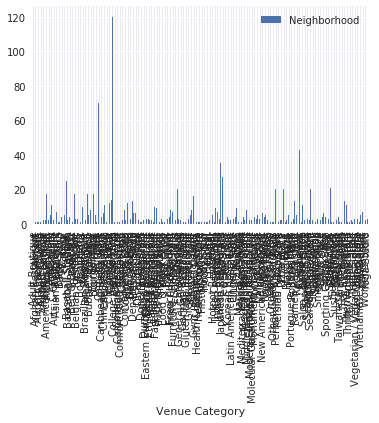

In [91]:
DV.groupby('Venue Category').count().plot(kind='bar')

## How many Halal or Kosher Restaurants can be found within the Manhattan area?

In [92]:
manhattan_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,5,5,5,5,5,5
Adult Boutique,2,2,2,2,2,2
Afghan Restaurant,1,1,1,1,1,1
African Restaurant,3,3,3,3,3,3
American Restaurant,80,80,80,80,80,80
Animal Shelter,1,1,1,1,1,1
Antique Shop,3,3,3,3,3,3
Arcade,1,1,1,1,1,1
Arepa Restaurant,3,3,3,3,3,3


## Total of 3 Restaurants are labeled as Jewish or Kosher.

## Total number of possible safe restaurants 89 within Manhattan.

These restaurants typically do not carry pork products: Afghan Restaurant 1, Ethiopian Restaurant 4, Falafel Restaurant 8, Indian Restaurant 32, Israeli Restaurant 2, Jewish Restaurant 3, Kebab Restaurant 1, Kosher Restaurant 1, Lebanese Restaurant 1, Middle Eastern Restaurant 6, Moroccan Restaurant 2, North Indian Restaurant	1, Pakistani Restaurant 1, Persian Restaurant 1, South Indian Restaurant 1, and	Vegetarian / Vegan Restaurant 24.

## Since Manhatta has more possible Halah and Kosher Restaurants, we will try a query the catergoy ID for the venues.

#### The pull for Catergoy ID information that provided the Halal and Jewish and Kosher Catergory information is a Premium Query and I wasted my premium query just trying to figure out how to query the information.

In [128]:
 
radius = 500
LIMIT = 100
categories = '52e81612bcbc57f1066b79ff, 52e81612bcbc57f1066b79fc,52e81612bcbc57f1066b79fd'
    
url4 = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(categories, CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)

# make the GET request
results = requests.get(url4).json()
results

{'meta': {'code': 400,
  'errorDetail': 'Invalid categoryId  52e81612bcbc57f1066b79fc',
  'errorType': 'param_error',
  'requestId': '5d22c313429bfc1ccf2ebe50'},
 'response': {}}

Did not work

In [123]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list3=[]
    
    categories = '52e81612bcbc57f1066b79ff, 52e81612bcbc57f1066b79fc,52e81612bcbc57f1066b79fd'
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            categories,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results4 = requests.get(url).json()["response"]
        
        # return only relevant information for each nearby venue
        venues_list3.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results4])

    nearby_venues3 = pd.DataFrame([item for venue_list2 in venues_list3 for item in venue_list3])
    nearby_venues3.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Categories ID',
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues3)

In [124]:
manhattan_venues2 = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


NameError: name 'venue_list3' is not defined

In [125]:
manhattan_venues2.head()

NameError: name 'manhattan_venues2' is not defined

Also Not working